In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(r'data_week11.csv')
df

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


In [4]:
df.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


최소값을 0, 최대값을 1에 매핑한 MinMaxScaler를 사용하여 정규화를 진행해준다.

In [6]:
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(df)

In [7]:
data_scale

array([[0.19364573, 0.28192873],
       [0.31868743, 0.43280197],
       [0.18585233, 0.36567258],
       ...,
       [0.68542236, 0.22436222],
       [0.89238196, 0.21044983],
       [0.68868894, 0.11036617]])

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

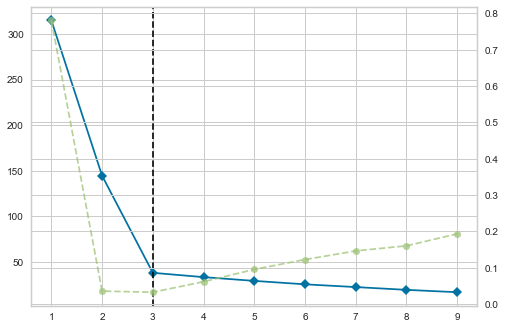

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [20]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

In [21]:
df

,V1,V2,cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2
...,...,...,...
2995,85.652800,-6.461061,1
2996,82.770880,-2.373299,1
2997,64.465320,-10.501360,1
2998,90.722820,-12.255840,1


In [23]:
df.cluster.value_counts()

0    1149
1     952
2     899
Name: cluster, dtype: int64

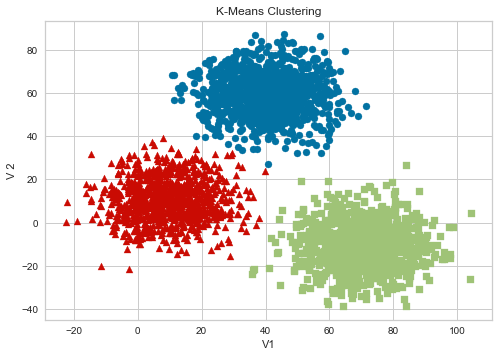

In [27]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index
marker2_ind = df[df['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 V1, V2 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df.loc[marker0_ind,'V1'], y=df.loc[marker0_ind,'V2'], marker='o') 
plt.scatter(x=df.loc[marker1_ind,'V1'], y=df.loc[marker1_ind,'V2'], marker='s')
plt.scatter(x=df.loc[marker2_ind,'V1'], y=df.loc[marker2_ind,'V2'], marker='^')

plt.xlabel('V1')
plt.ylabel('V 2')
plt.title('K-Means Clustering')
plt.show()

In [29]:
df2 = df.copy()
df2

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


In [30]:
df2.values

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

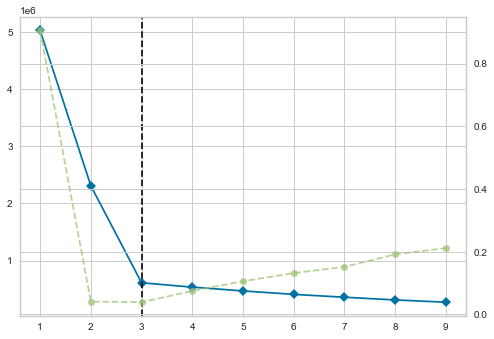

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df2.values)

In [32]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(df2.values)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df2['cluster'] = model.fit_predict(df2.values)

In [33]:
df2

,V1,V2,cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2
...,...,...,...
2995,85.652800,-6.461061,1
2996,82.770880,-2.373299,1
2997,64.465320,-10.501360,1
2998,90.722820,-12.255840,1


In [34]:
df2.cluster.value_counts()

0    1149
1     952
2     899
Name: cluster, dtype: int64

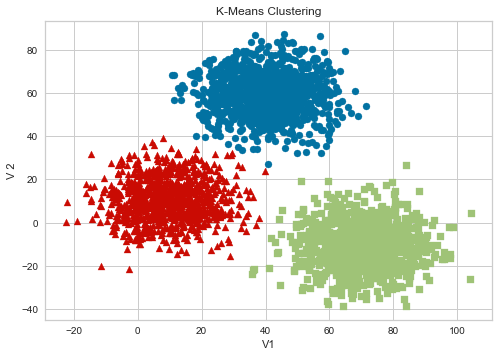

In [35]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df2[df2['cluster']==0].index
marker1_ind = df2[df2['cluster']==1].index
marker2_ind = df2[df2['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 V1, V2 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df2.loc[marker0_ind,'V1'], y=df2.loc[marker0_ind,'V2'], marker='o') 
plt.scatter(x=df2.loc[marker1_ind,'V1'], y=df2.loc[marker1_ind,'V2'], marker='s')
plt.scatter(x=df2.loc[marker2_ind,'V1'], y=df2.loc[marker2_ind,'V2'], marker='^')

plt.xlabel('V1')
plt.ylabel('V 2')
plt.title('K-Means Clustering')
plt.show()